<a href="https://colab.research.google.com/github/savimf/main_portfolio/blob/main/carteira_analiseB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise Quantitativa - Portfólio
### Usuário B

In [ ]:
import pandas as pd
import numpy as np
import pypfopt as pf
###
import sys
sys.path.append('/content/drive/MyDrive/Python_Projects/Quant/Projeto_Final/User_B')
###
import functions_aux as aux
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.graph_objects as go
import plotly.figure_factory as ff
import visuals
from scipy.stats import skew, kurtosis, shapiro
import warnings
warnings.filterwarnings("ignore")

## Ativos
- **Ações:**
    1. ITSA4
    2. SULA11
    3. SAPR11
    4. ALUP11
    5. NEOE3
    6. PNVL3
    7. BBSE3
    8. CPEL6
---
- **FIIs:**
    1. RBRP11
    2. VRTA11
    3. HSML11
---
- **Renda fixa:**
    1. Selic 2027
    2. IPCA+ 2030
---
- **Criptomoedas:**
    1. BTC
    2. XRP
    4. ETH
    5. ADA

## Carteira Passado
### Ações

In [6]:
acoes = [
    'ITSA4', 'SULA11', 'SAPR11', 'ALUP11',
    'NEOE3', 'PNVL3', 'BBSE3', 'CPLE6'
]

start_past = '16/08/2019'
end_past = '16/12/2020'

acoes_past = aux.carteira(acoes, start_past, end_past, source='yf')
acoes_past.head()

,ITSA4,SULA11,SAPR11,ALUP11,NEOE3,PNVL3,BBSE3,CPLE6
Date,,,,,,,,
2019-08-16,11.740145,38.719372,24.113091,24.310543,20.222250,13.010018,28.311480,3.988787
2019-08-19,11.533686,38.207092,24.255329,24.197775,20.174669,13.010018,28.234821,4.085886
2019-08-20,11.355378,38.352242,24.212042,23.915861,20.108053,12.845750,28.175201,4.076564
2019-08-21,11.496143,38.335159,25.006739,24.197775,19.984343,12.845750,28.354067,4.033064
2019-08-22,11.308453,39.359711,24.975817,24.244761,19.746435,13.108250,27.766369,4.008984


#### Retornos

In [7]:
# retornos diários
rets_past = aux.returns(acoes_past, 'daily')

# retornos acumulados
ret_past_acm = aux.returns(acoes_past, 'acm')

In [8]:
titles = [
    f'Retornos Acumulados: {start_past} - {end_past}',
    'Data',
    'Fator'
]

aux.plot_lines_go([ret_past_acm], titles)
# aux.plot_lines_sns(ret_past_acm, titles)

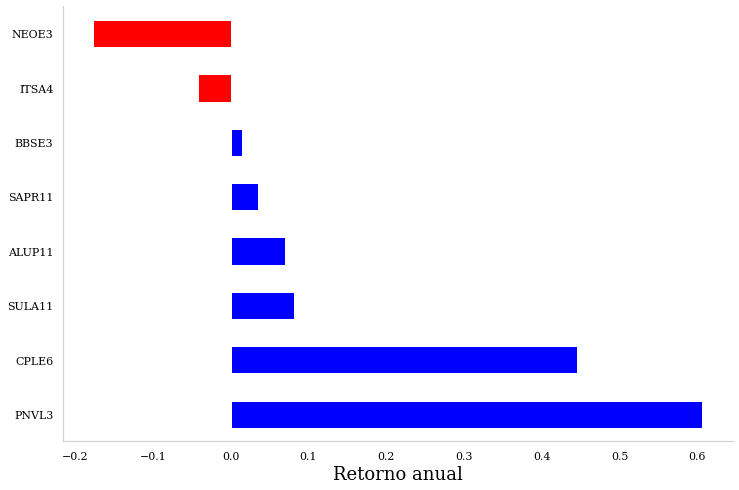

In [ ]:
# retornos das ações
aux.plot_returns_sns(
    aux.returns(acoes_past, 'total'),
    start_past,
    end_past
)

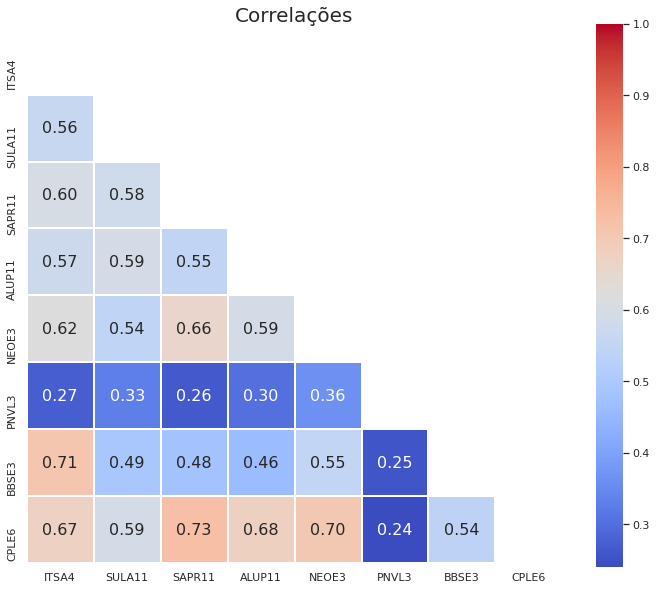

In [ ]:
aux.plot_heat_sns(rets_past, size=(12, 10))

### FIIs

In [9]:
start_past = '16/08/2019'
end_past = '16/12/2020'

fiis = ['RBRP11', 'VRTA11', 'HSML11']
fiis_past = aux.carteira(fiis, start_past, end_past, source='yf')
fiis_past.head()

,RBRP11,VRTA11,HSML11
Date,,,
2019-08-16,87.0,123.389999,102.099998
2019-08-19,87.0,124.349998,103.099998
2019-08-20,82.0,124.199997,102.730003
2019-08-21,82.0,124.199997,103.000000
2019-08-22,82.0,124.290001,102.610001


In [10]:
# retornos diários
fiis_rets_past = aux.returns(fiis_past, 'daily')

# retornos acumulados
fiis_ret_past_acm = aux.returns(fiis_past, 'acm')

In [11]:
titles = [
    f'Retornos Acumulados (FIIs): {start_past} - {end_past}',
    'Data',
    'Fator'
]

aux.plot_lines_go([fiis_ret_past_acm], titles)
# aux.plot_lines_sns(fiis_ret_past_acm, titles)

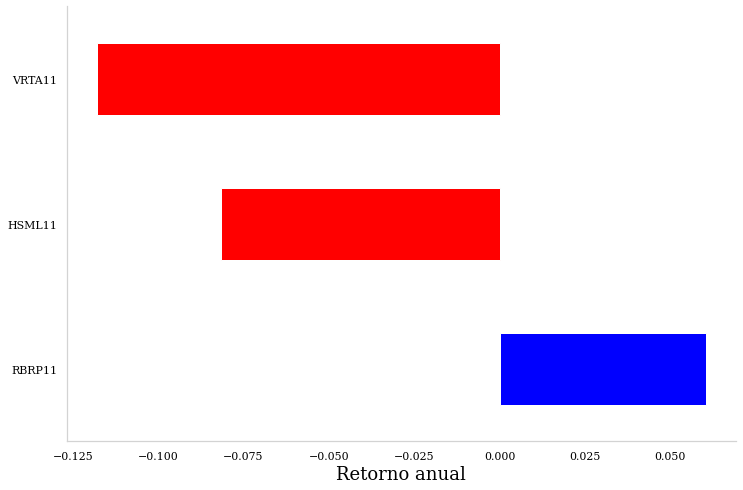

In [ ]:
# retornos das ações
aux.plot_returns_sns(
    aux.returns(fiis_past, 'total'),
    start_past,
    end_past
)

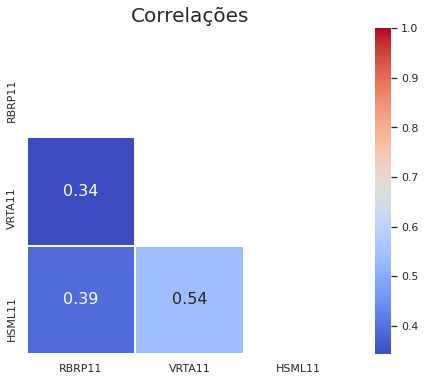

In [ ]:
aux.plot_heat_sns(fiis_rets_past, size=(8, 6))

### Renda Fixa

In [12]:
searchs = aux.search('tesouro', 5)
for s in searchs:
    print(s)

# ipca 2030 - 1
# selic 2027 - 4

{"id_": 1089866, "name": "Tesouro Selic LFT 0 01-Mar-2021", "symbol": "LFT030121=RRPS", "country": "brazil", "tag": "/rates-bonds/lft-0-01-mar-2021", "pair_type": "bonds", "exchange": "OTC Bonds"}
{"id_": 1089889, "name": "Tesouro IPCA + NTNB 6 15-Aug-2030", "symbol": "NTB081530=", "country": "brazil", "tag": "/rates-bonds/ntnb-6-15-aug-2030", "pair_type": "bonds", "exchange": "OTC Bonds"}
{"id_": 1172921, "name": "Tesouro Prefixado Vencimento em 01/07/2024", "symbol": "LTN070124=ANDS", "country": "brazil", "tag": "/rates-bonds/brstncltn7w3", "pair_type": "bonds", "exchange": "OTC Bonds"}
{"id_": 1172586, "name": "Tesouro Selic Vencimento em 01/03/2027", "symbol": "LFT030127=ANDS", "country": "brazil", "tag": "/rates-bonds/brstnclf1rg5", "pair_type": "bonds", "exchange": "OTC Bonds"}
{"id_": 1094220, "name": "Tesouro Prefixado LTN 0 01-Jan-2023", "symbol": "LTN010123=RRPS", "country": "brazil", "tag": "/rates-bonds/ltn-0-01-jan-2023", "pair_type": "bonds", "exchange": "OTC Bonds"}


In [13]:
# rf
titulos = {
    'IPCA2030': 1,
    'Selic2027': 4
}

rf_past = aux.rf_carteira(titulos, start_past, end_past)
rf_past.head()

,IPCA2030,Selic2027
Date,,
2019-08-16,4043.244,812.681
2019-08-19,4047.101,811.595
2019-08-20,4044.266,811.538
2019-08-21,4048.123,814.048
2019-08-22,4045.292,814.502


In [14]:
rf_ret_past_acm = aux.returns(rf_past, 'acm')

titles = [
    f'Retornos Acumulados (RF): {start_past} - {end_past}',
    'Data',
    'Fator'
]

aux.plot_lines_go([rf_ret_past_acm], titles)
# aux.plot_lines_sns(rf_ret_past_acm, titles)

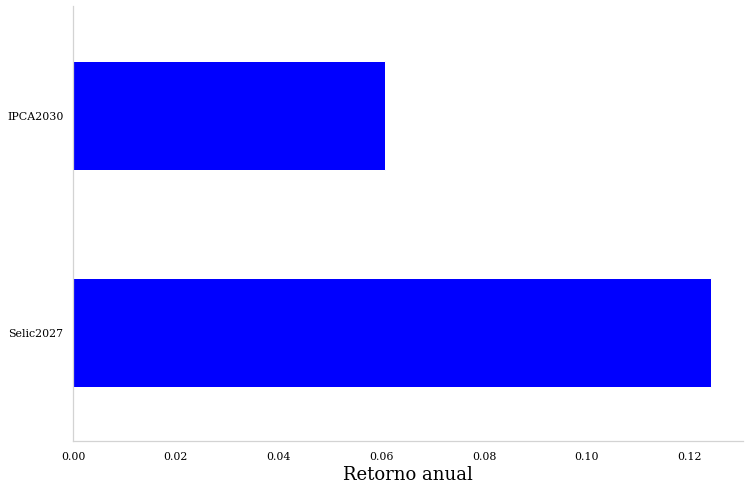

In [ ]:
# retornos das ações
aux.plot_returns_sns(
    aux.returns(rf_past, 'total'),
    start_past,
    end_past
)

## Análise I: Sem criptoativos
- Numa análise realizada previamente, identificamos que os modelos para estimar retornos e os de risco não se comportam de forma apropriada quando o histórico de criptoativos é levado em consideração, devido à sua alta volatilidade. Portanto, as análises serão feitas separadamente, uma somente com os ativos de renda variável e renda fixa, outra somente com os criptoativos para, *a posteriori*, construirmos um portfólio com todos.

### Carteira Passado

In [15]:
carteira_past = pd.concat(
    [acoes_past, fiis_past, rf_past],
    axis=1,
    join='inner'
    # keys=['acoes', 'fiis', 'rf']
)

# del acoes_past, fiis_past, rf_past

carteira_past.dropna(inplace=True)
carteira_past.head()

,ITSA4,SULA11,SAPR11,ALUP11,NEOE3,PNVL3,BBSE3,CPLE6,RBRP11,VRTA11,HSML11,IPCA2030,Selic2027
Date,,,,,,,,,,,,,
2019-08-16,11.740145,38.719372,24.113091,24.310543,20.222250,13.010018,28.311480,3.988787,87.0,123.389999,102.099998,4043.244,812.681
2019-08-19,11.533686,38.207092,24.255329,24.197775,20.174669,13.010018,28.234821,4.085886,87.0,124.349998,103.099998,4047.101,811.595
2019-08-20,11.355378,38.352242,24.212042,23.915861,20.108053,12.845750,28.175201,4.076564,82.0,124.199997,102.730003,4044.266,811.538
2019-08-21,11.496143,38.335159,25.006739,24.197775,19.984343,12.845750,28.354067,4.033064,82.0,124.199997,103.000000,4048.123,814.048
2019-08-22,11.308453,39.359711,24.975817,24.244761,19.746435,13.108250,27.766369,4.008984,82.0,124.290001,102.610001,4045.292,814.502


In [ ]:
carteira_past.describe()

,ITSA4,SULA11,SAPR11,ALUP11,NEOE3,PNVL3,BBSE3,CPLE6,RBRP11,VRTA11,HSML11,IPCA2030,Selic2027
count,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000
mean,10.148314,41.401585,26.979786,23.782645,19.235820,22.947026,26.463989,5.090391,87.994862,113.644466,95.913676,4100.637154,883.094261
std,1.527725,6.105058,3.361839,1.749559,2.742571,3.848950,2.958477,0.572178,6.582139,11.491593,13.344978,117.099740,28.077844
min,7.783676,22.963253,19.653460,19.602549,14.284362,12.845750,21.025738,3.807796,62.000000,99.500000,72.519997,3796.982000,809.790000
25%,8.944987,37.412952,24.424055,22.747652,17.369158,20.895731,24.283377,4.818894,86.349998,104.900002,87.980003,4039.095000,861.611000
50%,9.725154,40.085262,26.022963,23.406164,18.585363,22.805857,25.921505,5.114487,89.800003,109.169998,92.760002,4110.058000,896.963000
75%,11.252203,44.072659,29.583828,24.310543,20.364998,24.917873,28.311478,5.425838,92.309998,121.019997,102.800003,4174.620000,904.132000
max,13.364445,57.599751,34.891327,28.595663,26.392517,31.928200,32.882771,6.275113,105.279999,146.300003,126.400002,4380.827000,915.435000


#### Retornos
 - Pesos iguais: igualmente divido por setor e similarmente aos ativos/setor.

In [16]:
pesos_iguais = np.repeat(1/carteira_past.shape[1], carteira_past.shape[1])

# retornos
rets_carteira_past = (aux.returns(carteira_past) * pesos_iguais).sum(axis=1).to_frame()
rets_carteira_past.rename(columns={0: 'Retornos'}, inplace=True)

In [17]:
risk_values = aux.value_risk(rets_carteira_past)
c_vars_past = aux.c_value_risk(rets_carteira_past, risk_values)

In [18]:
hist_data = [
    rets_carteira_past['Retornos'].fillna(0)
]

group_labels = ['Retorno Percentual Diário']

fig = ff.create_distplot(hist_data, group_labels, bin_size=.0025)

fig.add_trace(
    go.Scatter(
        x=list(risk_values.values()),
        y=np.zeros_like(list(risk_values.values())),
        mode='markers',
        marker_color='red',
        marker_symbol='x',
        name='VaR',
        text=list(risk_values.keys()),
        hoverinfo='text+x'
    )
)


fig.update_layout(
    title=f'Carteira Passado: {start_past} - {end_past}',
    yaxis=dict(
        title='Frequência',
        showgrid=False
    ),
    xaxis=dict(
        showgrid=False,
        showspikes=True,
        spikethickness=2,
        spikedash='dot',
        spikecolor='#999999',
        spikemode='across'
    ),
    plot_bgcolor="#FFF",
    hoverdistance=100,
    spikedistance=1000
)

fig.show()

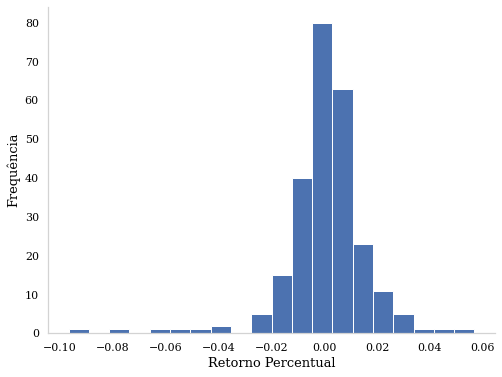

In [ ]:
rets_carteira_past['Retornos'].plot(kind='hist', bins=20, figsize=(8, 6));
plt.xlabel('Retorno Percentual Diário', fontdict={'size': 13});
plt.ylabel('Frequência', fontdict={'size': 13});

- VaR, CVaR, volatilidade, downside risk, skewness e curtose

In [ ]:
# anualizar?
risk_values = aux.value_risk(rets_carteira_past)
c_vars_past = aux.c_value_risk(rets_carteira_past, risk_values)

for i, j in zip(risk_values.keys(), c_vars_past.keys()):
    print(
        f'{i} / {j}: {risk_values[i]} / {c_vars_past[j]}'
    )

var_95 / c_var_95: -0.018800560691335944 / -0.042816671450244294
var_97 / c_var_97: -0.02622347705346742 / -0.05496919590037039
var_99 / c_var_99: -0.056814159279852304 / -0.07683166721460476


In [19]:
cov_carteira_past = aux.returns(carteira_past).cov()

vol_carteira_past_a = aux.vol(pesos_iguais, cov_carteira_past, True)

downside_past = rets_carteira_past[rets_carteira_past['Retornos'] < 0].std()

skew_past = skew(rets_carteira_past)
curtose_past = kurtosis(rets_carteira_past)

print(
    f'Volatilidade anualizada da carteira passado: {vol_carteira_past_a * 100} %\n'
    f'Downside risk: {downside_past[0]}\n'
    f'Skewness: {skew_past[0]}\n'
    f'Curtose: {curtose_past[0]}'
)

Volatilidade anualizada da carteira passado: 21.896499553992243 %
Downside risk: 0.01358032567488667
Skewness: -1.953542646071691
Curtose: 12.536376641538522


- Drawdown

In [20]:
rol_drawdown_past = rets_carteira_past.rolling(window=30).min()

fig = go.Figure()

fig.add_trace(
    go.Scatter(
        x=rol_drawdown_past.index,
        y=rol_drawdown_past['Retornos'].dropna()
    )
)

fig.update_layout(
    title=f'Drawdown: {start_past} - {end_past}',
    yaxis=dict(
        title='Retorno %',
        showgrid=False
    ),
    xaxis=dict(
        title='Data',
        showgrid=False,
        showspikes=True,
        spikethickness=2,
        spikedash='dot',
        spikecolor='#999999',
        spikemode='across'
    ),
    plot_bgcolor="#FFF",
    hoverdistance=100,
    spikedistance=1000
)

fig.show()

- Normalidade

In [ ]:
shapiro_past = shapiro(rets_carteira_past)

if shapiro_past[1] < .05:
    print('Hipótese nula rejeitada: a distribuição não é normal.')
else:
    print('Hipótese nula aceita: a distribuição é normal.')

Hipótese nula rejeitada: a distribuição não é normal.


- Benchmark passado

In [21]:
# ibovespa passado
ibvp_past = aux.search('bvsp', 1).retrieve_historical_data(
    from_date=start_past,
    to_date=end_past
)

ibvp_past.drop(ibvp_past.columns[[0, 1, 2, 4, 5]], axis=1, inplace=True)
ibvp_past.rename(columns={
    'Close': 'IBVP'
}, inplace=True)

In [22]:
# retornos acumulados
ret_carteira_past_acm = (1 + rets_carteira_past).cumprod()
ibvp_past_acm = aux.returns(ibvp_past, 'acm')

benchmark_past = pd.concat(
    [ret_carteira_past_acm, ibvp_past_acm],
    axis=1,
    join='inner'
)
benchmark_past.head()

,Retornos,IBVP
Date,,
2019-08-19,1.000532,0.996623
2019-08-20,0.992185,0.994149
2019-08-21,0.996212,1.013987
2019-08-22,0.995425,1.002054
2019-08-23,0.993949,0.978568


In [23]:
titles = [
    f'Benchmark IBVP (Carteira Passado): {start_past} - {end_past}',
    'Data',
    'Fator'
]

aux.plot_lines_go([benchmark_past], titles)
# aux.plot_lines_sns(benchmark_past, titles)

- $\beta$

In [ ]:
ibvp_past_ret = aux.returns(ibvp_past)
beta_past = aux.beta(rets_carteira_past, ibvp_past_ret)

print(f'Beta da carteira passado: {beta_past}')

Beta da carteira passado: -2.6192057805239107e-05


- Correlações

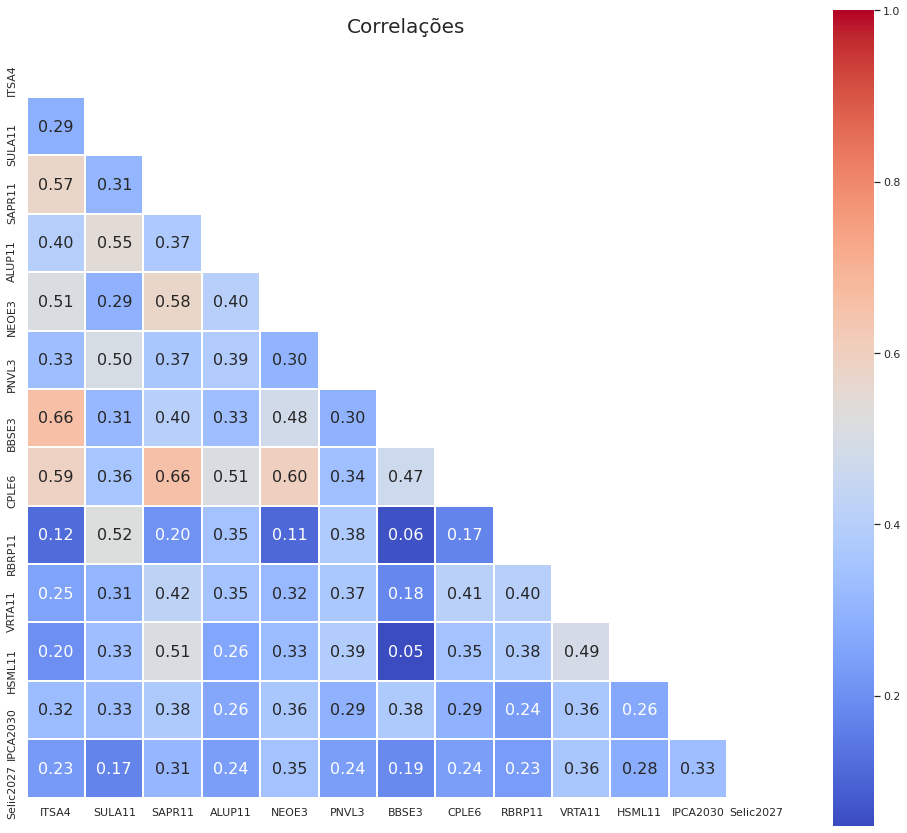

In [ ]:
aux.plot_heat_sns(aux.returns(carteira_past), size=(17, 15))

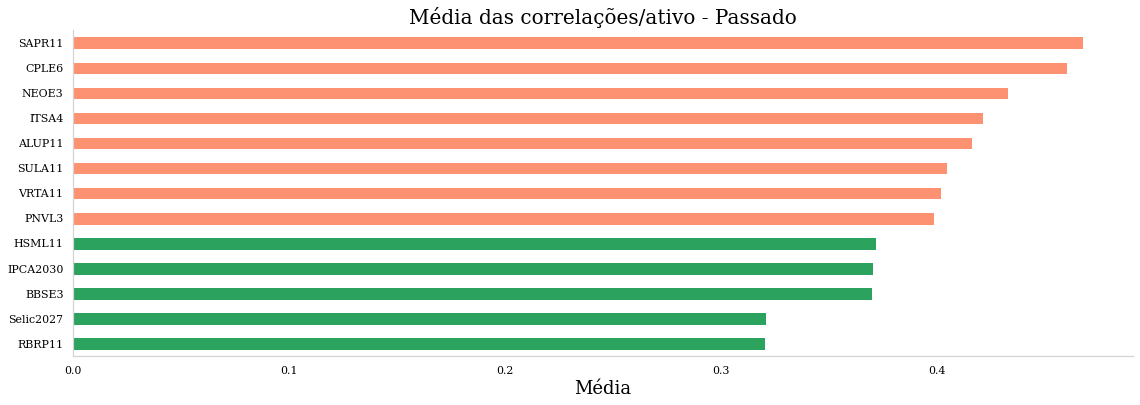

In [ ]:
correlations = aux.returns(carteira_past).corr()

medias = [(col, correlations[col].mean()) for col in correlations]
medias = pd.Series(data={media[0]: media[1] for media in medias}).sort_values()

cores = [
    '#2ca25f' if m < medias.mean() else '#fc9272' for m in medias
]

medias.sort_values().plot(kind='barh',
                          title='Média das correlações/ativo - Passado',
                          color=cores,
                          figsize=(19, 6))
plt.xlabel('Média');

del correlations, medias, cores

## Carteira Futuro

In [24]:
start_fut = '17/12/2020'
end_fut = '28/10/2021'

# acoes e fiis
acoes = [
    'ITSA4', 'SULA11', 'SAPR11', 'ALUP11',
    'NEOE3', 'PNVL3', 'BBSE3', 'CPLE6'
]

fiis = ['RBRP11', 'VRTA11', 'HSML11']

acoes_fut = aux.carteira(acoes, start_fut, end_fut, source='yf')
fiis_fut = aux.carteira(fiis, start_fut, end_fut, source='yf')

# rf
titulos = {
    'IPCA2030': 1,
    'Selic2027': 4
}
rf_fut = aux.rf_carteira(titulos, start_fut, end_fut)

# juntando todos
carteira_fut = pd.concat(
    [acoes_fut, fiis_fut, rf_fut],
    axis=1,
    join='inner'
    # keys=['acoes', 'fiis', 'rf'']
)
carteira_fut.dropna(inplace=True)
carteira_fut.head()

,ITSA4,SULA11,SAPR11,ALUP11,NEOE3,PNVL3,BBSE3,CPLE6,RBRP11,VRTA11,HSML11,IPCA2030,Selic2027
Date,,,,,,,,,,,,,
2020-12-17,11.418539,42.029873,25.084681,26.146729,16.585442,20.726978,29.042681,5.778968,93.089996,109.709999,93.800003,4324.229,913.740
2020-12-18,11.310911,41.550762,25.553822,25.827156,16.918520,20.796465,28.409231,5.777357,93.199997,111.050003,94.000000,4261.330,913.104
2020-12-21,11.134790,41.062263,25.707010,25.662529,16.595236,20.528444,27.804573,5.765275,92.739998,111.989998,93.690002,4302.937,913.002
2020-12-22,11.154357,40.291935,25.687860,25.391376,16.624626,20.498663,27.986931,5.825683,93.000000,112.349998,94.430000,4278.076,915.107
2020-12-23,11.418539,40.470428,26.511251,25.575373,16.830351,21.044634,27.958138,6.001267,93.959999,112.809998,94.809998,4300.726,915.620


### Retornos

In [25]:
pesos_iguais = np.repeat(1/carteira_fut.shape[1], carteira_fut.shape[1])

rets_carteira_fut = (aux.returns(carteira_fut) * pesos_iguais).sum(axis=1).to_frame()
rets_carteira_fut.rename(columns={0: 'Retornos'}, inplace=True)

In [26]:
risk_values = aux.value_risk(rets_carteira_fut)
c_vars_fut = aux.c_value_risk(rets_carteira_fut, risk_values)

hist_data = [
    rets_carteira_fut['Retornos'].fillna(0)
]

group_labels = ['Retorno Percentual Diário']

fig = ff.create_distplot(hist_data, group_labels, bin_size=.0025)

fig.add_trace(
    go.Scatter(
        x=list(risk_values.values()),
        y=np.zeros_like(list(risk_values.values())),
        mode='markers',
        marker_color='red',
        marker_symbol='x',
        name='VaR',
        text=list(risk_values.keys()),
        hoverinfo='text+x'
    )
)


fig.update_layout(
    title=f'Carteira Futuro: {start_fut} - {end_fut}',
    yaxis=dict(
        title='Frequência',
        showgrid=False
    ),
    xaxis=dict(
        showgrid=False,
        showspikes=True,
        spikethickness=2,
        spikedash='dot',
        spikecolor='#999999',
        spikemode='across'
    ),
    plot_bgcolor="#FFF",
    hoverdistance=100,
    spikedistance=1000
)

fig.show()

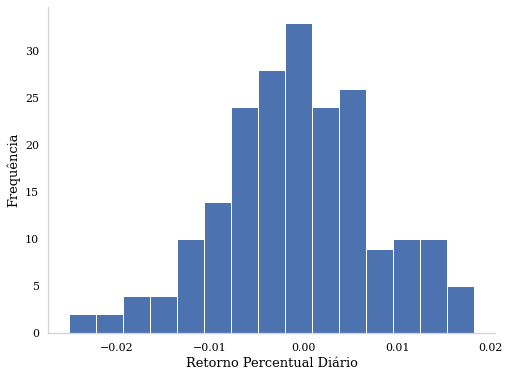

In [ ]:
rets_carteira_fut['Retornos'].plot(kind='hist', bins=15, figsize=(8, 6));
plt.xlabel('Retorno Percentual Diário', fontdict={'size': 13});
plt.ylabel('Frequência', fontdict={'size': 13});

In [27]:
# ibovespa futuro
ibvp_fut = aux.search('bvsp', 1).retrieve_historical_data(
    from_date=start_fut,
    to_date=end_fut
)

ibvp_fut.drop(ibvp_fut.columns[[0, 1, 2, 4, 5]], axis=1, inplace=True)
ibvp_fut.rename(columns={
    'Close': 'IBVP'
}, inplace=True)

- Volatilidade, downside risk, skewness e curtose

In [28]:
cov_carteira_fut = aux.returns(carteira_fut).cov()

vol_carteira_fut_a = aux.vol(pesos_iguais, cov_carteira_fut, True)

downside_fut = rets_carteira_fut[rets_carteira_fut['Retornos'] < 0].std()

skew_fut = skew(rets_carteira_fut)
curtose_fut = kurtosis(rets_carteira_fut)

print(
    f'Volatilidade anualizada da carteira passado: {vol_carteira_fut_a * 100} %\n'
    f'Downside risk: {downside_fut[0]}\n'
    f'Skewness: {skew_fut[0]}\n'
    f'Curtose: {curtose_fut[0]}'
)

Volatilidade anualizada da carteira passado: 13.033913938598971 %
Downside risk: 0.005414668734179412
Skewness: -0.14518344782183867
Curtose: 0.09929411781052577


- Drawdown

In [29]:
rol_drawdown_fut = rets_carteira_fut.rolling(window=30).min()

fig = go.Figure()

fig.add_trace(
    go.Scatter(
        x=rol_drawdown_fut.index,
        y=rol_drawdown_fut['Retornos'].dropna()
    )
)

fig.update_layout(
    title=f'Drawdown: {start_fut} - {end_fut}',
    yaxis=dict(
        title='Retorno %',
        showgrid=False
    ),
    xaxis=dict(
        title='Data',
        showgrid=False,
        showspikes=True,
        spikethickness=2,
        spikedash='dot',
        spikecolor='#999999',
        spikemode='across'
    ),
    plot_bgcolor="#FFF",
    hoverdistance=100,
    spikedistance=1000
)

fig.show()

- Normalidade

In [ ]:
shapiro_fut = shapiro(rets_carteira_fut)

if shapiro_past[1] < .05:
    print('Hipótese nula rejeitada: a distribuição não é normal.')
else:
    print('Hipótese nula aceita: a distribuição é normal.')

Hipótese nula rejeitada: a distribuição não é normal.


- Benchmark futuro

In [30]:
# retornos acumulados
ret_carteira_fut_acm = (1 + rets_carteira_fut).cumprod()
ibvp_fut_acm = aux.returns(ibvp_fut, 'acm')

benchmark_fut = pd.concat(
    [ret_carteira_fut_acm, ibvp_fut_acm],
    axis=1,
    join='inner'
)

titles = [
    f'Benchmark IBVP (Carteira Futuro): {start_fut} - {end_fut}',
    'Data',
    'Fator'
]

aux.plot_lines_go([benchmark_fut], titles)
# aux.plot_lines_sns(benchmark_past, titles)

- $\beta$

In [31]:
ibvp_fut_ret = aux.returns(ibvp_fut)
beta_fut = aux.beta(rets_carteira_fut, ibvp_fut_ret)

print(f'Beta da carteira futuro: {beta_fut}')

Beta da carteira futuro: 0.00017051145118084397


## Cenários de Otimizações
### Estimando Retornos

- Média Histórica

In [32]:
ret_fut_a = aux.returns(carteira_fut, 'total', 'a')

ret_past_mean = pf.expected_returns.mean_historical_return(
    prices=carteira_past,
    compounding=True
)

aux.all_metrics(y_true=ret_fut_a, y_pred=ret_past_mean)

MAE: 0.2337268556839044
RSME: 0.30576822496685524


- Média Histórica Exponencial

In [33]:
ret_past_ema = pf.expected_returns.ema_historical_return(
    prices=carteira_past,
    compounding=True
)

aux.all_metrics(y_true=ret_fut_a, y_pred=ret_past_ema)

MAE: 0.2858534986506947
RSME: 0.335850882416685


- Modelo CAPM: a ser utilizado

In [34]:
selic_d = aux.selic(start_past, end_past, 'd')

ret_past_capm = pf.expected_returns.capm_return(
    prices=carteira_past,
    market_prices=ibvp_past,
    risk_free_rate=selic_d
)

aux.all_metrics(y_true=ret_fut_a, y_pred=ret_past_capm)

MAE: 0.26302147854855334
RSME: 0.3098736790314793


### Modelos de Risco

In [35]:
# sample covariance
samplecov_past = pf.risk_models.sample_cov(carteira_past)
samplecov_fut = pf.risk_models.sample_cov(carteira_fut)

print(
    f'M.A.E. para sample covariance: {aux.mae_cov(samplecov_past, samplecov_fut)} %'
)

# semicovariance
semicov_fut = pf.risk_models.semicovariance(
    prices=carteira_fut,
    benchmark=selic_d
)
semicov_past = pf.risk_models.semicovariance(
    prices=carteira_past,
    benchmark=selic_d
)

print(f'M.A.E. para semi covariance: {aux.mae_cov(semicov_past, semicov_fut)} %')

# exponential
expcov_fut = pf.risk_models.exp_cov(prices=carteira_fut)
expcov_past = pf.risk_models.exp_cov(prices=carteira_past)

print(
    f'M.A.E. para exponential covariance: {aux.mae_cov(expcov_past, expcov_fut)} %'
)

# ledoit-wolf
lwcov_fut = pf.risk_models.CovarianceShrinkage(carteira_fut).ledoit_wolf()
lwcov_past = pf.risk_models.CovarianceShrinkage(carteira_past).ledoit_wolf()

print(
    f'M.A.E. para Ledoit Wolf covariance: {aux.mae_cov(lwcov_past, lwcov_fut)} %'
)

M.A.E. para sample covariance: 7.41 %
M.A.E. para semi covariance: 3.3000000000000003 %
M.A.E. para exponential covariance: 3.56 %
M.A.E. para Ledoit Wolf covariance: 7.12 %


### Otimizações

In [38]:
acoes = [
    'ITSA4', 'SULA11', 'SAPR11', 'ALUP11',
    'NEOE3', 'PNVL3', 'BBSE3', 'CPLE6'
]

fiis = ['RBRP11', 'VRTA11', 'HSML11']

rf = ['Selic2027', 'IPCA2030']

# dicionários para guardar os dados de cada otimização
# para futura comparação
vols = {}
rets = {}
sharpes ={}
pesos = {}

In [39]:
# restrições
sector_mapper = {
    stock: aux.find([acoes, fiis, rf], stock)
    for stock in carteira_fut.columns
}

# no mínimo 1/3 em todos os setores
sector_lower = {
    'acoes': .33,
    'fiis': .33,
    'rf': .33
}

# não mais que 55% em nenhum setor
sector_upper = {
    'acoes': .55,
    'fiis': .55,
    'rf': .55
}

#### Mínima Volatilidade

In [40]:
model = pf.EfficientFrontier(ret_past_capm, lwcov_past)
model.add_sector_constraints(
    sector_mapper,
    sector_lower,
    sector_upper
)

# no mínimo 3% por ativo
for t in carteira_fut.columns:
    stock = model.tickers.index(t)
    model.add_constraint(lambda w: w[stock] >= .03)


which = 'Min. Vol.'

model.min_volatility()

OrderedDict([('ITSA4', 0.03),
             ('SULA11', 0.03),
             ('SAPR11', 0.03),
             ('ALUP11', 0.052153797297538),
             ('NEOE3', 0.03),
             ('PNVL3', 0.03),
             ('BBSE3', 0.097846202702462),
             ('CPLE6', 0.03),
             ('RBRP11', 0.0565060519564988),
             ('VRTA11', 0.2233607799318349),
             ('HSML11', 0.0501331681116663),
             ('IPCA2030', 0.0683532994943434),
             ('Selic2027', 0.2716467005056565)])

In [41]:
pesos_min_vol = np.array(
    list(model.clean_weights().values())
)

selic_a = aux.selic(start_past, end_past, 'a')

pesos[which] = pesos_min_vol

model.portfolio_performance(verbose=True, risk_free_rate=selic_a)

Expected annual return: 7.0%
Annual volatility: 14.7%
Sharpe Ratio: 0.35


(0.06967738834484749, 0.14721864499478168, 0.35181116357999176)

In [42]:
cov_carteira_fut = aux.returns(carteira_fut).cov()

vol_opt_min = aux.vol(pesos_min_vol, cov_carteira_fut, True)
vol_iguais = aux.vol(pesos_iguais, cov_carteira_fut, True)

ret_opt_min = ret_fut_a.dot(pesos_min_vol)
ret_iguais = ret_fut_a.dot(pesos_iguais)

selic_a = aux.selic(start_past, end_past, 'a')

vols[which] = vol_opt_min
rets[which] = ret_opt_min
sharpes[which] = aux.sharpe(ret_opt_min, vol_opt_min, selic_a)

aux.comparison(
      vol_opt=vol_opt_min,
      vol_eq=vol_iguais,
      ret_opt=ret_opt_min,
      ret_eq=ret_iguais,
      risk_free_rate=selic_a
)

Volatlidade com os pesos otimizados: 8.219999999999999 %
Volatilidade com os pesos iguais: 13.03 %
Diferença percentual: -36.9148 %

Retorno com os pesos otimizados: -10.08 %
Retorno com os pesos iguais: -14.6 %
Diferença percentual: -30.9589 %

Índice de Sharpe: -1.4438


#### Máximo Índice de Sharpe

In [43]:
model = pf.EfficientFrontier(ret_past_capm, lwcov_past)
model.add_sector_constraints(
    sector_mapper,
    sector_lower,
    sector_upper
)

# no mínimo 3% por ativo
for t in carteira_fut.columns:
    stock = model.tickers.index(t)
    model.add_constraint(lambda w: w[stock] >= .03)


which = 'Max. Sharpe'

model.max_sharpe(risk_free_rate=selic_a)

OrderedDict([('ITSA4', 0.1178648546952152),
             ('SULA11', 0.0421351453047847),
             ('SAPR11', 0.03),
             ('ALUP11', 0.03),
             ('NEOE3', 0.03),
             ('PNVL3', 0.03),
             ('BBSE3', 0.03),
             ('CPLE6', 0.03),
             ('RBRP11', 0.1587540846192431),
             ('VRTA11', 0.141245915380757),
             ('HSML11', 0.03),
             ('IPCA2030', 0.172606233180478),
             ('Selic2027', 0.1573937668195221)])

In [44]:
pesos_max_sp = np.array(
    list(model.clean_weights().values())
)

pesos[which] = pesos_max_sp

model.portfolio_performance(verbose=True, risk_free_rate=selic_a)

Expected annual return: 8.2%
Annual volatility: 16.0%
Sharpe Ratio: 0.40


(0.08214769631088209, 0.15953873843669072, 0.4028079411435233)

In [45]:
vol_opt_max = aux.vol(pesos_max_sp, cov_carteira_fut, True)
ret_opt_max = ret_fut_a.dot(pesos_max_sp)

vols[which] = vol_opt_max
rets[which] = ret_opt_max
sharpes[which] = aux.sharpe(ret_opt_max, vol_opt_max, selic_a)

aux.comparison(
      vol_opt=vol_opt_max,
      vol_eq=vol_iguais,
      ret_opt=ret_opt_max,
      ret_eq=ret_iguais,
      risk_free_rate=selic_a
)

Volatlidade com os pesos otimizados: 10.12 %
Volatilidade com os pesos iguais: 13.03 %
Diferença percentual: -22.3331 %

Retorno com os pesos otimizados: -11.91 %
Retorno com os pesos iguais: -14.6 %
Diferença percentual: -18.4247 %

Índice de Sharpe: -1.3536


#### Retorno e Risco Eficiente

In [46]:
model = pf.EfficientFrontier(ret_past_capm, lwcov_past)
model.add_sector_constraints(
    sector_mapper,
    sector_lower,
    sector_upper
)

# no mínimo 3% por ativo
for t in carteira_fut.columns:
    stock = model.tickers.index(t)
    model.add_constraint(lambda w: w[stock] >= .03)


# visando máximo retorno com risco de 25%
which = 'Max. Ret. Risk 25%'

model.efficient_risk(target_volatility=.25)

OrderedDict([('ITSA4', 0.0300000000007756),
             ('SULA11', 0.1299999999915089),
             ('SAPR11', 0.0300000000015743),
             ('ALUP11', 0.0300000000009444),
             ('NEOE3', 0.030000000001136),
             ('PNVL3', 0.0300000000013392),
             ('BBSE3', 0.0300000000012708),
             ('CPLE6', 0.0300000000005408),
             ('RBRP11', 0.2699999999945027),
             ('VRTA11', 0.0300000000030262),
             ('HSML11', 0.0300000000028741),
             ('IPCA2030', 0.2999999999971214),
             ('Selic2027', 0.0300000000033848)])

In [47]:
pesos_max_ret_risk = np.array(
    list(model.clean_weights().values())
)

pesos[which] = pesos_max_ret_risk

model.portfolio_performance(verbose=True, risk_free_rate=selic_a)

Expected annual return: 9.3%
Annual volatility: 20.1%
Sharpe Ratio: 0.37


(0.09286619664214617, 0.20078398957089896, 0.3734459667517744)

In [48]:
vol_opt_max_ret_risk = aux.vol(pesos_max_ret_risk, cov_carteira_fut, True)
ret_opt_max_ret_risk = ret_fut_a.dot(pesos_max_ret_risk)

vols[which] = vol_opt_max_ret_risk
rets[which] = ret_opt_max_ret_risk
sharpes[which] = aux.sharpe(ret_opt_max_ret_risk, vol_opt_max_ret_risk, selic_a)

aux.comparison(
      vol_opt=vol_opt_max_ret_risk,
      vol_eq=vol_iguais,
      ret_opt=ret_opt_max_ret_risk,
      ret_eq=ret_iguais,
      risk_free_rate=selic_a
)

Volatlidade com os pesos otimizados: 13.05 %
Volatilidade com os pesos iguais: 13.03 %
Diferença percentual: 0.1535 %

Retorno com os pesos otimizados: -17.52 %
Retorno com os pesos iguais: -14.6 %
Diferença percentual: 20.0 %

Índice de Sharpe: -1.4796


#### Hierarquical Risk Parity

In [49]:
# objeto
hrp = pf.HRPOpt(returns=aux.returns(carteira_past))

which = 'HRP'

# otimização
hrp.optimize()

OrderedDict([('ALUP11', 0.01410630745046943),
             ('BBSE3', 0.009339132396038938),
             ('CPLE6', 0.005567112491597281),
             ('HSML11', 0.018512416603828383),
             ('IPCA2030', 0.14280010975917062),
             ('ITSA4', 0.00996994220452035),
             ('NEOE3', 0.006952259074863476),
             ('PNVL3', 0.007181988388320198),
             ('RBRP11', 0.01939010740829216),
             ('SAPR11', 0.005252788161561533),
             ('SULA11', 0.005994574852039071),
             ('Selic2027', 0.7112849600427643),
             ('VRTA11', 0.043648301166534204)])

In [50]:
pesos_hrp = np.array(
    list(hrp.clean_weights().values())
)

pesos[which] = pesos_hrp

hrp.portfolio_performance(verbose=True, risk_free_rate=selic_a)

Expected annual return: 8.4%
Annual volatility: 7.2%
Sharpe Ratio: 0.92


(0.08408983442590509, 0.07186056165658358, 0.9213065880800276)

In [51]:
vol_hrp = aux.vol(pesos_hrp, cov_carteira_fut, True)
ret_hrp = ret_fut_a.dot(pesos_hrp)

vols[which] = vol_hrp
rets[which] = ret_hrp
sharpes[which] = aux.sharpe(ret_hrp, vol_hrp, selic_a)

aux.comparison(
      vol_opt=vol_hrp,
      vol_eq=vol_iguais,
      ret_opt=ret_hrp,
      ret_eq=ret_iguais,
      risk_free_rate=selic_a
)

Volatlidade com os pesos otimizados: 4.390000000000001 %
Volatilidade com os pesos iguais: 13.03 %
Diferença percentual: -66.3085 %

Retorno com os pesos otimizados: -5.96 %
Retorno com os pesos iguais: -14.6 %
Diferença percentual: -59.1781 %

Índice de Sharpe: -1.765


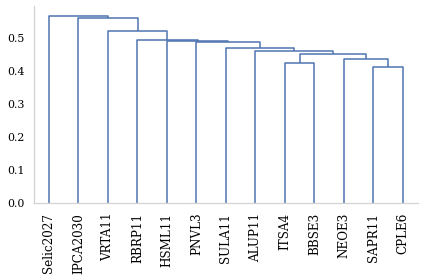

In [52]:
from pypfopt import plotting

plotting.plot_dendrogram(
    hrp=hrp,
    ax=None,
    show_tickers=True
);

### Comparação entre Otimizações

In [53]:
sharpe_iguais = aux.sharpe(ret_iguais, vol_iguais, selic_a)

ret_cores = [
    'red' if ret < ret_iguais else 'blue'
    for ret in rets.values()
]

vol_cores = [
    'blue' if vol < vol_iguais else 'red'
    for vol in vols.values()
]

sharpe_cores = [
    'red' if s < sharpe_iguais else 'blue'
    for s in sharpes.values()
]

colors = {
    'rets': ret_cores,
    'vols': vol_cores,
    'sharpes': sharpe_cores
}

# aux.plot_opt_comparisons(rets, vols, sharpes, cores)
data = [
    go.Bar(
        x=list(rets.keys()),
        y=list(rets.values()),
        marker={
            'color': colors['rets'],
            'line': {
                'color': '#333',
                'width': 2
            }
        },
        opacity=.7,
        showlegend=False,
        text='R',
        hoverinfo='text+y'
    ),
    #
    go.Bar(
        x=list(vols.keys()),
        y=list(vols.values()),
        marker={
            'color': colors['vols'],
            'line': {
                'color': '#333',
                'width': 2
            }
        },
        opacity=.7,
        showlegend=False,
        text='V',
        hoverinfo='text+y'
    ),
    #
    go.Bar(
        x=list(sharpes.keys()),
        y=list(sharpes.values()),
        marker={
            'color': colors['sharpes'],
            'line': {
                'color': '#333',
                'width': 2
            }
        },
        opacity=.7,
        showlegend=False,
        text='S',
        hoverinfo='text+y'
    )
]

cfg_layout = go.Layout(
    title='Resultados Otimizados',
    xaxis=dict(
            title='Tipo de Otimização',
            showgrid=False
        ),
        yaxis=dict(
            title='Valor Registrado',
            showgrid=False
        ),
        plot_bgcolor="#FFF",
        hoverdistance=100
)

fig = go.Figure(data=data, layout=cfg_layout)

fig.show()

- Benchmark: otimizações referentes à Min. Vol., Max. Sharpe, e HRP.

In [54]:
# retornos totais anuais
ret_min_vol = (aux.returns(carteira_fut) * pesos['Min. Vol.']).sum(axis=1).to_frame()
ret_min_vol.rename(columns={0: 'Retornos'}, inplace=True)

ret_max_sharpe = (aux.returns(carteira_fut) * pesos['Max. Sharpe']).sum(axis=1).to_frame()
ret_max_sharpe.rename(columns={0: 'Retornos'}, inplace=True)

ret_hrp = (aux.returns(carteira_fut) * pesos['HRP']).sum(axis=1).to_frame()
ret_hrp.rename(columns={0: 'Retornos'}, inplace=True)

# retornos acumulados
ret_min_vol_acm = (1 + ret_min_vol).cumprod()
ret_max_sharpe_acm = (1 + ret_max_sharpe).cumprod()
ret_hrp_acm = (1 + ret_hrp).cumprod()

In [55]:
titles = [
    'Benchmark entre Carteiras e IBVP',
    'Dias',
    'Fator'
]

data = [
    go.Scatter(y=ret_carteira_fut_acm['Retornos'], name='Carteira Pesos Iguais'),
    go.Scatter(y=ret_min_vol_acm['Retornos'], name='Carteira Min. Vol.'),
    go.Scatter(y=ret_max_sharpe_acm['Retornos'], name='Carteira Max. Sharpe'),
    go.Scatter(y=ret_hrp_acm['Retornos'], name='Carteira HRP'),
    go.Scatter(y=ibvp_fut_acm['IBVP'], name='IBVP')
]

cfg_layout = go.Layout(
    title=titles[0],
    xaxis=dict(
        title=titles[1],
        showgrid=False,
        showspikes=True,
        spikethickness=2,
        spikedash='dot',
        spikecolor='#999999',
        spikemode='across'
    ),
    yaxis=dict(
        title=titles[2],
        showgrid=False
    ),
    plot_bgcolor="#FFF",
    hoverdistance=100,
    spikedistance=1000
)

fig = go.Figure(data=data, layout=cfg_layout)

fig.show()

del data, cfg_layout, fig

- Pesos

In [56]:
pesos_acoes = pd.Series(
    {par[0]: par[1] for par in zip(carteira_fut.columns, pesos['HRP'])}
).sort_values(ascending=True)

titles = [
    'Pesos Otimizados',
    'Peso (%)',
    'Ativos'
]

data = [
    go.Bar(
        y=pesos_acoes.index,
        x=pesos_acoes.values * 100,
        marker={
            'line': {
                'color': '#333',
                'width': 2
            }
        },
        hoverinfo='x',
        orientation='h'
    )
]

cfg_layout = go.Layout(
    title=titles[0],
    xaxis=dict(
        title=titles[1],
        showgrid=False,
        showspikes=True,
        spikethickness=2,
        spikedash='dot',
        spikecolor='#999999',
        spikemode='across'
    ),
    yaxis=dict(
        title=titles[2],
        showgrid=False
    ),
    plot_bgcolor="#FFF",
    hoverdistance=100,
    spikedistance=1000
)

fig = go.Figure(data=data, layout=cfg_layout)

fig.update_layout(template='ggplot2')
fig.show()

del data, cfg_layout, fig